In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv("titanic.csv")

In [4]:
df.head() #show first five records

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.tail() #show last five records

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [10]:
df.shape  #show total rows and columns

(891, 12)

# Data Cleaning

## check null

In [6]:
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.isnull().sum() #total null value column wise

In [ ]:
df.isnull().sum().sum() #total null value in whole dataset

## Remove null/Duplicate Data

In [8]:
dropData = df.dropna() # drops rows with 1 or more Nan value
dropData.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [9]:
dropeColumn = df.drop(['Age','Cabin'], axis = 1) #Drops Height column form the dataframe
dropeColumn.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [10]:
renameDf = df.rename(columns={'Sex': 'Gender'}) #renames Sex column to Gender
renameDf

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [11]:
fillAge=df
fillAge['Age'] = fillAge['Age'].fillna(18) #fill missing age with 18
fillAge.isnull().sum()
fillAge

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,18.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [12]:
fillAge=df
fillAge['Age'] = fillAge['Age'].fillna(fillAge['Age'].mean()) #fill missing age with mean value
fillAge.isnull().sum()
fillAge

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,18.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [13]:
print("Mean of Age = ",df['Age'].mean()) #find mean
print("Median of Age =",df['Age'].median()) #find median
print("Mode of Age = ",df['Age'].mode()) #find mode
print("Standart Deviation of Age = ",df['Age'].std()) #find standard daviasion

Mean of Age =  27.375050505050503
Median of Age = 24.0
Mode of Age =  0    18.0
dtype: float64
Standart Deviation of Age =  13.815394599752993


In [14]:
test = pd.Series(range(6)) # temprory create dateset
test.loc[2:4] = np.nan
test

0    0.0
1    1.0
2    NaN
3    NaN
4    NaN
5    5.0
dtype: float64

In [15]:
ffill = test.fillna(method="ffill") # forward fill/ Replace with previous value
ffill

0    0.0
1    1.0
2    1.0
3    1.0
4    1.0
5    5.0
dtype: float64

In [16]:
bfill = test.fillna(method="bfill") # Backward fill/ Replace with next value
bfill

0    0.0
1    1.0
2    5.0
3    5.0
4    5.0
5    5.0
dtype: float64

In [17]:
linear = test.interpolate(method='linear') #interpolate with linear method. Linear method is default method
linear

0    0.0
1    1.0
2    2.0
3    3.0
4    4.0
5    5.0
dtype: float64

# Outliers

In [50]:
sample= [15, 18, 7, 13, 16, 11, 21, 5, 15, 10, 9]
temp = pd.DataFrame(sample, columns = ['sample'])
print("Without Outliers:")
print(temp['sample'].describe())

sample= [15, 101, 18, 7, 13, 16, 11, 21, 5, 15, 10, 9]
temp = pd.DataFrame(sample, columns = ['sample'])
print("\nWith Outliers:")
print(temp['sample'].describe())

Without Outliers:
count    11.000000
mean     12.727273
std       4.839234
min       5.000000
25%       9.500000
50%      13.000000
75%      15.500000
max      21.000000
Name: sample, dtype: float64

With Outliers:
count     12.000000
mean      20.083333
std       25.896501
min        5.000000
25%        9.750000
50%       14.000000
75%       16.500000
max      101.000000
Name: sample, dtype: float64


## Detecting outliers

### Boxplots

Text(0.5, 0, 'Sample')

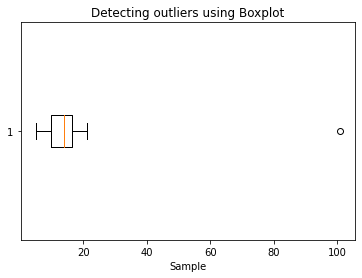

In [51]:
plt.boxplot(sample, vert=False)
plt.title("Detecting outliers using Boxplot")
plt.xlabel('Sample')

### z-score

In [53]:
outliers=[]
x_mean = temp['sample'].mean()
x_std = temp['sample'].std()
for i in temp['sample']:
    z_score = (i-x_mean)/x_std
    if(z_score>3):
        outliers.append(i)
        
outliers

[101]

### Inter Quantile Range(IQR)

In [54]:
outliers=[]
data = sorted(temp['sample']) #sort data in ascending order
q1 = np.percentile(temp['sample'], 25) #calculate fist quantile
q3 = np.percentile(temp['sample'], 75) #calculate third quntile

IQR = q3-q1

lwr_bound = q1-(1.5*IQR)
upr_bound = q3+(1.5*IQR)

for i in temp['sample']: 
    if (i<lwr_bound or i>upr_bound):
        outliers.append(i)
outliers

[101]

## Handling Outliers
### Trimming/Remove the outliers

In [ ]:
newData = temp
for i in outliers:
    newData = newData.drop(newData[newData['sample']==101].index[0])
newData

,sample
0,15
2,18
3,7
4,13
5,16
6,11
7,21
8,5
9,15
10,10


# Data Cleaning

## check null

In [ ]:
df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,False,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
df.isnull().sum() #total null value column wise

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
df.isnull().sum().sum() #total null value in whole dataset

689

## Remove null/Duplicate Data

In [ ]:
dropData = df.dropna() # drops rows with 1 or more Nan value
dropData.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [ ]:
dropeColumn = df.drop(['Age','Cabin'], axis = 1) #Drops Height column form the dataframe
dropeColumn.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [ ]:
renameDf = df.rename(columns={'Sex': 'Gender'}) #renames Sex column to Gender
renameDf

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,18.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
fillAge=df
fillAge['Age'] = fillAge['Age'].fillna(18) #fill missing age with 18
fillAge.isnull().sum()
fillAge

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,18.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
fillAge=df
fillAge['Age'] = fillAge['Age'].fillna(fillAge['Age'].mean()) #fill missing age with mean value
fillAge.isnull().sum()
fillAge

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,18.0,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
print("Mean of Age = ",df['Age'].mean()) #find mean
print("Median of Age =",df['Age'].median()) #find median
print("Mode of Age = ",df['Age'].mode()) #find mode
print("Standart Deviation of Age = ",df['Age'].std()) #find standard daviasion

Mean of Age =  27.375050505050503
Median of Age = 24.0
Mode of Age =  0    18.0
dtype: float64
Standart Deviation of Age =  13.815394599752993


In [ ]:
test = pd.Series(range(6)) # temprory create dateset
test.loc[2:4] = np.nan
test

0    0.0
1    1.0
2    NaN
3    NaN
4    NaN
5    5.0
dtype: float64

In [ ]:
ffill = test.fillna(method="ffill") # forward fill/ Replace with previous value
ffill

0    0.0
1    1.0
2    1.0
3    1.0
4    1.0
5    5.0
dtype: float64

In [ ]:
bfill = test.fillna(method="bfill") # Backward fill/ Replace with next value
bfill

0    0.0
1    1.0
2    5.0
3    5.0
4    5.0
5    5.0
dtype: float64

In [ ]:
linear = test.interpolate(method='linear') #interpolate with linear method. Linear method is default method
linear

0    0.0
1    1.0
2    2.0
3    3.0
4    4.0
5    5.0
dtype: float64